<a href="https://colab.research.google.com/github/wilmerod/Notebooks-Curso-Big-Data/blob/main/2_a_ML_Ejemplo_Clusterizacion_alumnos_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Creamos un grupo de alumnos

In [ ]:
n_alumnos = 60

Creamos un serie de calificaciones de Lengua

In [ ]:
Lengua=5+5*(np.random.rand(n_alumnos))
Lengua

array([7.71382647, 8.0007611 , 5.70018371, 7.51711096, 8.35955023,
       5.25793991, 5.21009025, 5.97234797, 8.33576179, 8.09867875,
       9.10268968, 9.65464148, 5.7649844 , 8.20884835, 8.76550207,
       7.95671561, 6.24465748, 8.28988777, 5.62430919, 5.81978916,
       8.13232027, 7.46830375, 7.26927462, 9.61480695, 7.51974351,
       8.36247085, 8.91704339, 6.71252548, 9.18942582, 9.11646302,
       6.53570079, 7.64917732, 8.49654969, 9.08616891, 9.1128675 ,
       6.88732022, 9.92765384, 6.42716494, 5.76274262, 8.76489475,
       7.55459128, 5.63644518, 7.46614818, 8.60050892, 9.18762587,
       6.44906427, 5.63890316, 8.10382948, 8.92352932, 9.19018352,
       7.33666593, 9.73944412, 8.96031362, 5.91369078, 9.14820538,
       9.12500689, 6.39746514, 6.47116532, 5.44235034, 5.65313837])

Creamos un serie de calificaciones de Matemáticas

In [ ]:
Matematicas=5+5*(np.random.rand(n_alumnos))
Matematicas

array([6.20090502, 7.61561468, 9.00450601, 6.97367095, 7.07390613,
       8.23445132, 6.63375276, 9.6671436 , 8.85607132, 9.64899567,
       6.44742433, 9.10796106, 5.32074457, 8.757511  , 7.54657347,
       8.52655366, 9.77376185, 5.92399544, 5.0030484 , 9.88435605,
       7.47475807, 8.44013539, 5.73348302, 6.87833606, 7.06232063,
       7.0200678 , 9.70823932, 5.12420327, 5.20327278, 6.56355061,
       9.54856058, 6.2911681 , 7.86365675, 7.74701144, 5.76715446,
       8.56918799, 8.24758067, 8.87117828, 6.51785487, 6.11405102,
       8.13807412, 7.47652973, 8.63481754, 9.95124392, 6.80044918,
       7.72578116, 6.19162436, 7.88525517, 6.8745288 , 9.46877114,
       8.72432353, 5.21491256, 8.35531171, 7.16430784, 5.12684136,
       8.79663233, 6.46872286, 5.13694602, 5.88965612, 9.74453712])

Visualizamos los datos de las calificaciones del grupo de alumnos

Text(0, 0.5, 'Matemáticas')

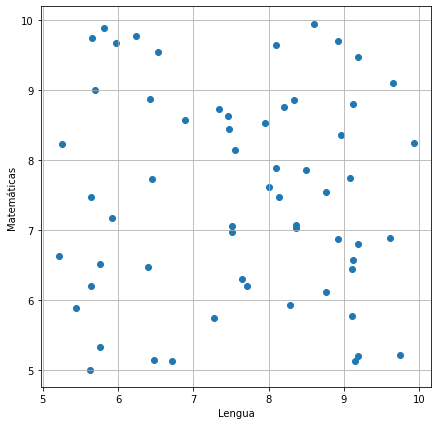

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(Lengua, Matematicas)
plt.grid()
plt.xlabel('Lengua')
plt.ylabel('Matemáticas')

Creamos un DataFrame con los datos de los alumnos y sus calificaciones en Lengua y Matemáticas

In [ ]:
np.arange(1,n_alumnos+1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60])

In [ ]:
X=pd.DataFrame(index=np.arange(1,n_alumnos+1))

In [ ]:
X['Lengua']=Lengua

In [ ]:
X['Matemáticas']=Matematicas

In [ ]:
X.head()

,Lengua,Matemáticas
1,7.713826,6.200905
2,8.000761,7.615615
3,5.700184,9.004506
4,7.517111,6.973671
5,8.359550,7.073906


Podemos exportar la tabla a excel

In [ ]:
X.to_excel('sample_data/notas_alumnos.xlsx')

También podríamos importar un fichero excel como origen de los datos de los alumnos

In [ ]:
X=pd.read_excel('sample_data/notas_alumnos.xlsx', index_col=0)

In [ ]:
X.head()

,Lengua,Matemáticas
1,7.713826,6.200905
2,8.000761,7.615615
3,5.700184,9.004506
4,7.517111,6.973671
5,8.359550,7.073906


Visualizamos los datos de la tabla de notas de los alumnos

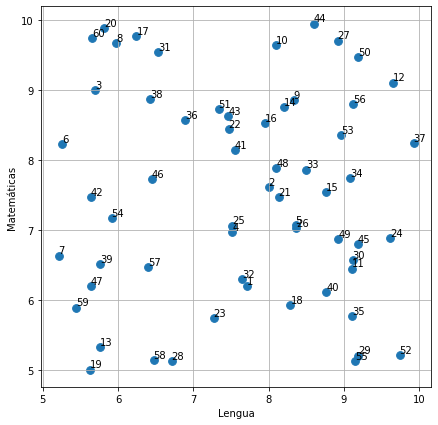

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(X['Lengua'],X['Matemáticas'], s=60)
plt.grid()
plt.xlabel('Lengua')
plt.ylabel('Matemáticas')
for i in range(len(X)):
  plt.text(X['Lengua'].iloc[i], X['Matemáticas'].iloc[i], s=str(i+1), ha='left', va='bottom')

Deseamos agrupar los alumnos en función de sus calificaciones en estas materias 

In [ ]:
n_grupos = 3

kmeans = KMeans(n_clusters=n_grupos, random_state=42)  #Crea el modelo
kmeans.fit(X)  #Entrena el modelo con los datos

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

Creamos una copia de la tabla y le incorporamos la columna con la clasificación que he realizado el modelo

In [ ]:
X_clasificado = X.copy()
X_clasificado['Grupo'] = kmeans.labels_

In [ ]:
X_clasificado.head()

,Lengua,Matemáticas,Grupo
1,7.713826,6.200905,2
2,8.000761,7.615615,2
3,5.700184,9.004506,1
4,7.517111,6.973671,2
5,8.359550,7.073906,2


Hacemos recuento de alumnos por grupo de clusterización

In [ ]:
X_clasificado['Grupo'].value_counts().sort_index()

0    14
1    23
2    23
Name: Grupo, dtype: int64

Visualizamos el resultado de la clusterización de los alumnos

No handles with labels found to put in legend.


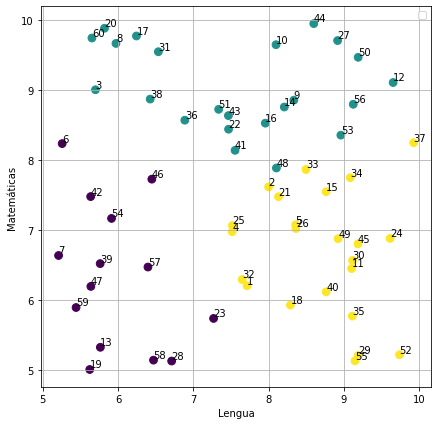

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(X_clasificado['Lengua'],X_clasificado['Matemáticas'],c=X_clasificado['Grupo'], s=60)
plt.grid()
plt.xlabel('Lengua')
plt.ylabel('Matemáticas')
for i in range(len(X_clasificado)):
  plt.text(X_clasificado['Lengua'].iloc[i], X_clasificado['Matemáticas'].iloc[i], s=str(i+1), ha='left', va='bottom')
plt.legend()

Vemos el indicador score que representa una medida del grado de agrupación (relacionado con el inverso de suma de las distancias de los puntos a sus centroides)

In [ ]:
kmeans.score(X)

-87.86721377971925

Para saber cuántos clusters o grupos debemos usar en nuestro modelo se uniliza la técnica del codo. 
Esta consiste en iterar la clusterización con una secuencia de valores de número de clusters y elegimos aquél número de clusters donde la pendiente del score se reduce significativamente

In [ ]:
scores=[]
for k in range(2,8):
  kmeans= KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X)
  scores.append([k,kmeans.score(X)])
scores

[[2, -146.25230164058237],
 [3, -87.86721377971925],
 [4, -55.70515069377487],
 [5, -43.95422343613967],
 [6, -36.02531340099361],
 [7, -29.475219975916517]]

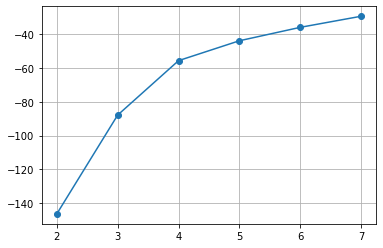

In [ ]:
score=pd.DataFrame(scores)
plt.plot(score.iloc[:,0],score.iloc[:,1],'-o')
plt.grid()

Podemos asignar cada alumno a una clase en función de su grupo o cluster

In [ ]:
dic = {0:'A', 1:'B', 2:'C', 3:'D'}

X_clasificado['Clase']=[dic.get(n, n) for n in X_clasificado['Grupo']]

In [ ]:
X_clasificado = X_clasificado.drop('Grupo', axis=1)
X_clasificado.head()

,Lengua,Matemáticas,Clase
1,7.713826,6.200905,C
2,8.000761,7.615615,C
3,5.700184,9.004506,B
4,7.517111,6.973671,C
5,8.359550,7.073906,C


Y podemos exportar a excel el resultado de la clusterización

In [ ]:
X_clasificado.to_excel('sample_data/notas_alumnos_clasificado.xlsx')

El modelo, una vez entrenado, permite clasificar nuevos alumnos

In [ ]:
  kmeans= KMeans(n_clusters=4, random_state=42)  #Utilizamos el modelo con el número de clusters elegido
  kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

Generamos un nuevo grupo de alumnos

In [ ]:
n_alumnos_nuevos = 10

In [ ]:
X_nuevo=pd.DataFrame(index=np.arange(1,n_alumnos_nuevos+1))
X_nuevo['Lengua']=5+5*(np.random.rand(n_alumnos_nuevos))
X_nuevo['Matemáticas']=5+5*(np.random.rand(n_alumnos_nuevos))

In [ ]:
X_nuevo

,Lengua,Matemáticas,Grupo,Clase
1,5.269445,5.869318,2,C
2,5.407259,8.498388,3,D
3,5.222576,7.402508,2,C
4,7.363299,5.892274,1,B
5,8.859359,5.140144,1,B
6,5.281727,6.180545,2,C
7,8.349038,7.644138,0,A
8,7.719641,7.661413,0,A
9,8.262779,7.728581,0,A
10,5.598805,6.130804,2,C


Con model.predict() generamos las nuevas etiquetas de asignación de los alumnos nuevos a los grupos o clusters ya creados

In [ ]:
kmeans.predict(X_nuevo)

array([2, 3, 2, 1, 1, 2, 0, 0, 0, 2], dtype=int32)

In [ ]:
X_nuevo['Grupo']=kmeans.predict(X_nuevo)
X_nuevo

,Lengua,Matemáticas,Grupo
1,5.269445,5.869318,2
2,5.407259,8.498388,3
3,5.222576,7.402508,2
4,7.363299,5.892274,1
5,8.859359,5.140144,1
6,5.281727,6.180545,2
7,8.349038,7.644138,0
8,7.719641,7.661413,0
9,8.262779,7.728581,0
10,5.598805,6.130804,2


Asignamos los alumnos por clase en función del grupo o cluster

In [ ]:
X_nuevo['Clase']=[dic.get(n, n) for n in X_nuevo['Grupo']]
X_nuevo

,Lengua,Matemáticas,Grupo,Clase
1,5.269445,5.869318,2,C
2,5.407259,8.498388,3,D
3,5.222576,7.402508,2,C
4,7.363299,5.892274,1,B
5,8.859359,5.140144,1,B
6,5.281727,6.180545,2,C
7,8.349038,7.644138,0,A
8,7.719641,7.661413,0,A
9,8.262779,7.728581,0,A
10,5.598805,6.130804,2,C
